In [16]:
import numpy as np
import cv2
import warnings
import pandas as pd

from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
import matplotlib.pyplot as plt
import os

from sklearn.svm import SVC


In [17]:
warnings.simplefilter(action='ignore')


In [18]:
data = pd.read_csv(r"C:\teste_opencv_sckit_learn\teste_tipos.csv",sep=";")

In [19]:
dict_imgs = data.to_dict("records")

In [20]:
for imgs in dict_imgs:
    print(imgs['tipo'],imgs['url'])

torneira https://produtos.deca.com.br/4992.C99.03/PTI/imagem-principal_4992.c99.03_V1_M.jpg
torneira https://produtos.deca.com.br/2241.C.MR/PTI/imagem-principal_2241.c.mr_V1_M.jpg
torneira https://produtos.deca.com.br/1258.C27/PTI/imagem-principal_1258.c27_V1_M.jpg
torneira https://produtos.deca.com.br/1162.C/PTI/imagem-principal_1162.c_V1_M.jpg
torneira https://produtos.deca.com.br/1159.C37/PTI/imagem-principal_1159.c37_V1_M.jpg
torneira https://produtos.deca.com.br/1189.C.PT/PTI/imagem-principal_1189.c.pt_V1_M.jpg
assento https://produtos.deca.com.br/AP.01.17/PTI/imagem-principal_ap.01.17_V1_M.jpg
assento https://produtos.deca.com.br/AP.165.17/PTI/imagem-principal_ap.165.17_V1_M.jpg
assento https://produtos.deca.com.br/AP.215.17/PTI/imagem-principal_ap.215.17_V1_M.jpg
cuba https://produtos.deca.com.br/CC.620.75.DUO.INX/PTI/imagem-principal_cc.620.75.duo.inx_V1_M.jpg
cuba https://produtos.deca.com.br/AC.300.42.MULT.VD/PTI/imagem-principal_ac.300.42.mult.vd_V1_M.jpg
cuba https://produt

In [21]:
from urllib.request import urlopen

In [22]:
resp = urlopen(imgs['url'])
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR) # The image object
image = cv2.imread(f"{imgs['url']}")
#image = cv2.resize(f'{image}', (300,300))

In [23]:
image

In [24]:
image = cv2.imread(f"{imgs['url']}")
#image = cv2.resize(f'{image}', (300,300))

In [25]:
data_path = r'C:\teste_opencv_sckit_learn\imagens'

image_names = []
x_image = []
y_label = []

labels = os.listdir(data_path)
cont = len(labels)
i = 0
while i < cont:
    try:
        if '.jpg' in labels[i]:
            if labels[i] != None:
                image_names.append(labels[i])
                image = cv2.imread(os.path.join(data_path,labels[i]))
                image = cv2.resize(image, (300,300))
                x_image.append(image.flatten())
                y_label.append(labels[i])
                print(labels[i])
                #13350641PRM002G.jpg
                #print(image)
    except:
        pass   
    i +=1
    
    
x_image_n = np.array(x_image)


y_label_n = np.array(y_label)
y_label_n.shape 
       
       
x_train, x_test, y_train, y_test = train_test_split(x_image_n, y_label_n, test_size=0.2, random_state=0)
x_train

clf = SVC(gamma=0.001)
 
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

13350641PRM002G.jpg
20590620PRM001G.jpg
28595322PRM001G.jpg


In [26]:
print(
    f"Detalhes classificação {clf}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Detalhes classificação SVC(gamma=0.001):
                     precision    recall  f1-score   support

20590620PRM001G.jpg       0.00      0.00      0.00       0.0
28595322PRM001G.jpg       0.00      0.00      0.00       1.0

           accuracy                           0.00       1.0
          macro avg       0.00      0.00      0.00       1.0
       weighted avg       0.00      0.00      0.00       1.0




Confusion matrix:
[[0 0]
 [1 0]]


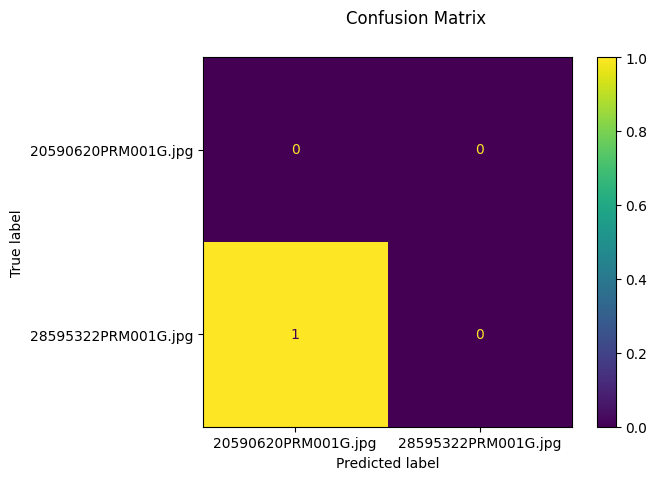

In [27]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [28]:
y_true = []
y_pred = []
cm = disp.confusion_matrix


# Para cada célula na matriz de confusão, são adicionados  correspondentes
# e previsões para as listas

for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Detalhes confusion matrix:\n"
    f"{classification_report(y_true, y_pred)}\n"
)
 

Detalhes confusion matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


